<a href="https://colab.research.google.com/github/Nafiz144/nk/blob/main/Lab_Assingment_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

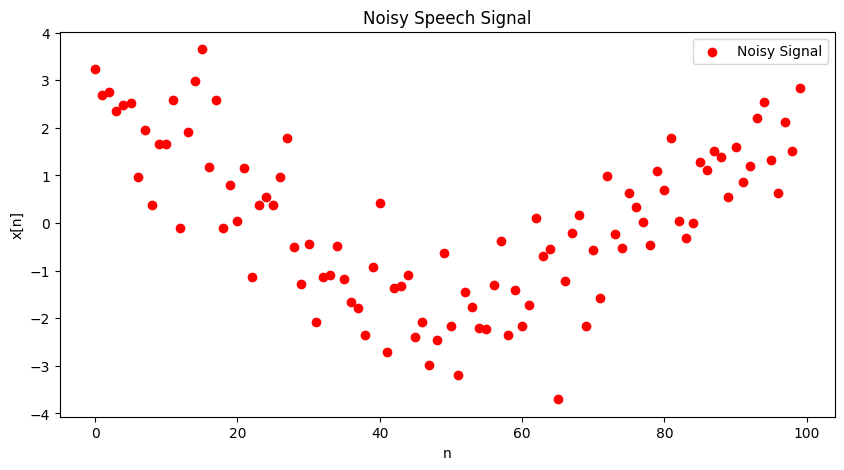

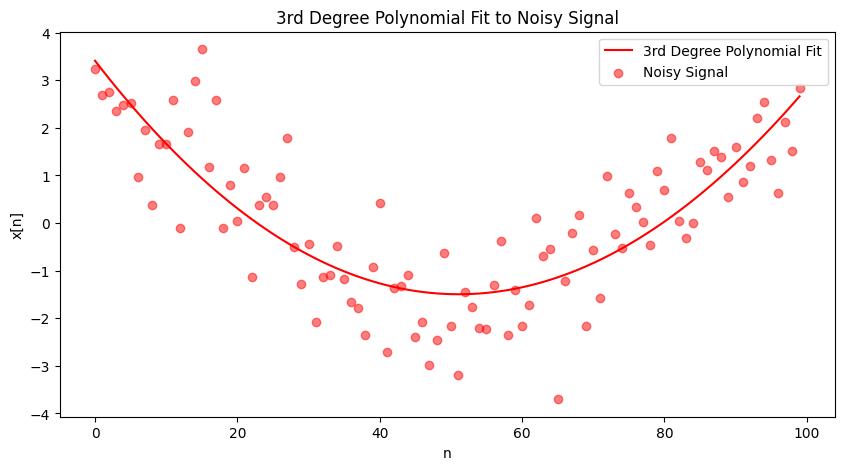

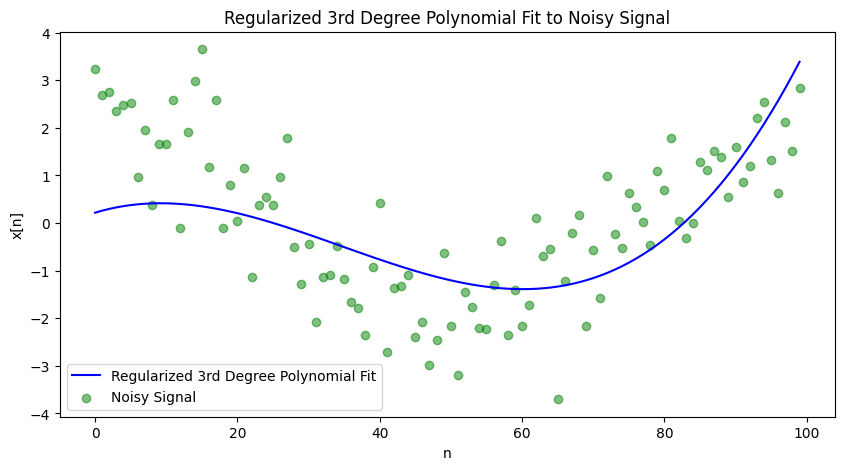

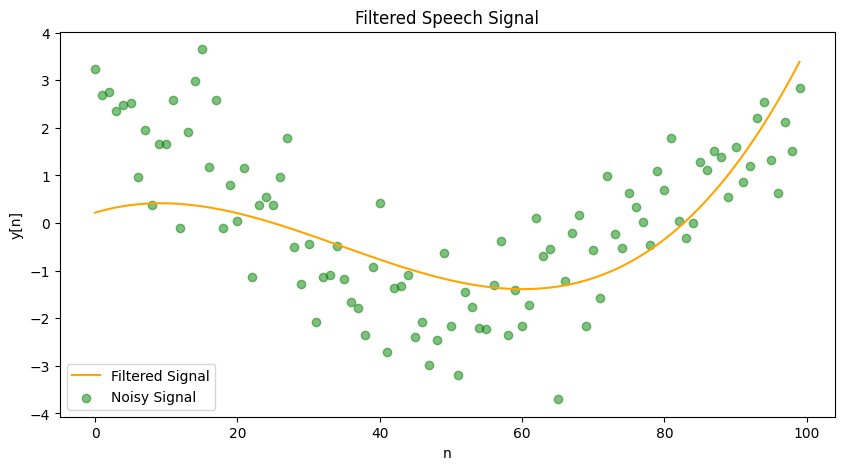

In [1]:
#Prblem_A
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, solve


n = np.arange(100)
eta = np.random.randn(100)
x = 2 * np.cos(2 * np.pi * n / 100) + eta
plt.figure(figsize=(10, 5))
plt.scatter(n, x, color='red', label='Noisy Signal')
plt.title('Noisy Speech Signal')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.legend()
plt.show()
X = np.vstack([n**3, n**2, n, np.ones(len(n))]).T
beta_ls = np.linalg.lstsq(X, x, rcond=None)[0]
x_ls = X @ beta_ls
plt.figure(figsize=(10, 5))
plt.plot(n, x_ls, color='red', label='3rd Degree Polynomial Fit')
plt.scatter(n, x, color='red', alpha=0.5, label='Noisy Signal')
plt.title('3rd Degree Polynomial Fit to Noisy Signal')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.legend()
plt.show()
lambda_ = 100
beta_reg_ls = inv(X.T @ X + lambda_ * np.eye(X.shape[1])) @ X.T @ x
x_reg_ls = X @ beta_reg_ls
plt.figure(figsize=(10, 5))
plt.plot(n, x_reg_ls, color='blue',
         label='Regularized 3rd Degree Polynomial Fit')
plt.scatter(n, x, color='green', alpha=0.5, label='Noisy Signal')
plt.title('Regularized 3rd Degree Polynomial Fit to Noisy Signal')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.legend()
plt.show()
y = x_reg_ls
plt.figure(figsize=(10, 5))
plt.plot(n, y, color='orange', label='Filtered Signal')
plt.scatter(n, x, color='green', alpha=0.5, label='Noisy Signal')
plt.title('Filtered Speech Signal')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.show()


In [ ]:
#Problem_B
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt


t = np.array([0.5, 1.0, 1.5])
a = np.array([45, 26, 40])


def lagra_inter(x, x_points, y_points):
    n = len(x_points)
    result = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term = term * (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result


t_plot = np.linspace(0.4, 1.6, 500)
a_plot = np.array([lagra_inter(ti, t, a) for ti in t_plot])

plt.figure(figsize=(10, 5))
plt.plot(t_plot, a_plot, label='Lagrange Fit', color='red')
plt.scatter(t, a, color='blue', label='Data Points')
plt.title('Lagrange Fit to the acceleration Data')
plt.xlabel('t')
plt.ylabel('a(t)')
plt.legend()
plt.show()


def lagrange_poly(t):
    return lagra_inter(t, t, a)


velocity, _ = quad(lagrange_poly, 0.5, 1.5)
average_velocity = velocity / (1.5 - 0.5)
print(f'Average velocity (2nd order polynomial): {average_velocity:.2f}')


def trapez_rule(x, y):
    n = len(x) - 1
    h = (x[-1] - x[0]) / n
    integral = 0.5 * y[0] + 0.5 * y[-1]
    for i in range(1, n):
        integral = integral + y[i]
    integral *= h
    return integral


trapez_velocity = trapez_rule(t, a)
average_trapezo_velocity = trapez_velocity / (1.5 - 0.5)
print(f'Average velocity (trapezoidal rule): {
      average_trapezo_velocity:.2f}')


In [ ]:
#problem_C
import numpy as np


def f(x):
    return np.exp(-x**2)


def derivative(f, x, dx=0.05):
    return (-f(x + 2*dx) + 8*f(x + dx) - 8*f(x - dx) + f(x - 2*dx)) / (12 * dx)


x_val = 1.75
dx = 0.05
f_prime_approx = derivative(f, x_val, dx)
print(f'Appr deri at x = {x_val}: {f_prime_approx:.6f}')


def gradi_descent(f, derivative, x0, learning_rate=0.1, max_iter=500, tol=0.005):
    x = x0
    for k in range(1, max_iter + 1):
        grad = derivative(f, x)
        x_new = x - (1 / (k + 1)) * grad
        if abs(grad) < tol:
            break
        x = x_new
    return x, k


x0 = 1.75


x_min, num_iters = gradi_descent(f, derivative, x0)
print(f'Minimized value of x: {x_min:.6f} after {num_iters} iterations')


def true_derivative(x):
    return -2 * x * np.exp(-x**2)


true_f_prime = true_derivative(x_val)
percent_error = abs((true_f_prime - f_prime_approx) / true_f_prime) * 100
print(f'True derivative at x = {x_val}: {true_f_prime:.6f}')
print(f'Percent relative error: {percent_error:.2f}%')


In [ ]:
#problem_D
import numpy as np
import matplotlib.pyplot as plt


def gaussian(x):
    return np.exp(-x**2)


x = np.arange(-10, 51)
y = gaussian(x)
plt.plot(x, y, label='True Gaussian Function')


def polynomial_regression(x, y, degree):

    X = np.vander(x, degree + 1)

    w = np.linalg.pinv(X) @ y
    return w


w = polynomial_regression(x, y, 3)

x_regress = np.linspace(-10, 50, 1000)


y_regress = polynomial_regression(x_regress, np.ones(len(x_regress)), 3) @ w


plt.plot(x_regress, y_regress, label='3rd Order Polynomial Regression')


def regularized_least_squares(X, y, lambda_=100):

    X = np.c_[np.ones(len(X)), X]

    I = np.eye(len(X))
    I[0, 0] = 0
    U, S, Vt = np.linalg.svd(X.T @ X + lambda_ * I)
    w = Vt.T @ np.linalg.inv(np.diag(S) + lambda_ * np.eye(len(S))) @ X.T @ y
    return w


w_reg = regularized_least_squares(x[:, np.newaxis], y, lambda_=100)
x_regress_reg = np.linspace(-10, 50, 1000)

y_regress_reg = regularized_least_squares(
    x_regress_reg[:, np.newaxis], np.ones(len(x_regress_reg)), lambda_=100) @ w_reg

plt.plot(x_regress_reg, y_regress_reg,
         label='Regularized Least Squares (lambda=100)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Function, Polynomial Regression, and Regularized Least Squares')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#Problem_E
import numpy as np
import matplotlib.pyplot as plt


def ln_plus_one(t):

    return np.log(1 + t)


def polynomial_fit(t, degree):

    X = np.vander(t, degree + 1)

    w = np.linalg.pinv(X) @ ln_plus_one(t)
    return w


def integrate_polynomial(w, t_low, t_high):

    n = len(t_fit) - 1
    dt = (t_high - t_low) / n

    v_low = polynomial_fit(t_low, 4) @ w
    v_high = polynomial_fit(t_high, 4) @ w

    integral = (v_low + v_high) / 2 + dt * \
        np.sum(polynomial_fit(t_fit[1:-1], 4) @ w)

    return integral


def integrate_ln_plus_one(t_low, t_high):

    return np.log(1 + t_high) - np.log(1 + t_low)


t_data = np.array([0.5, 1, 1.5, 2, 2.5])

t_fit = np.linspace(0.5, 2.5, 100)
w_fit = polynomial_fit(t_data, 4)

estimated_distance = integrate_polynomial(w_fit, 0.5, 2.5)
actual_distance = integrate_ln_plus_one(0.5, 2.5)


print("Estimated distanc:", estimated_distance)
print("Actual distance traveled:", actual_distance)


plt.plot(t_data, ln_plus_one(t_data), 'o', label='Data Points')
plt.plot(t_fit, polynomial_fit(t_fit, 4) @ w_fit,
         label='4 Degree Polynomia Fit')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('fitting and integration')
plt.legend()
plt.grid(True)




In [ ]:
#problem_F
import numpy as np


def f(x, y):

    return np.exp(-(x**2 + y**2) / 2)


def partial_deriv(f, x, y, dx=0.05, dy=0.075):

    if np.abs(x) < dx:
        dx = np.abs(x)

    if np.abs(y) < dy:
        dy = np.abs(y)

    if np.isnan(x):
        x = 0

    if np.isnan(y):
        y = 0

    f_x_forwa = (f(x + dx, y) - f(x, y)) / dx

    f_x_back = (f(x, y) - f(x - dx, y)) / dx

    f_x = (f_x_forwa + f_x_back) / 2

    f_y_forward = (f(x, y + dy) - f(x, y)) / dy
    f_y_back = (f(x, y) - f(x, y - dy)) / dy

    f_y = (f_y_forward + f_y_back) / 2

    return f_x, f_y


def gradie_descent(f, x, y, learning_rate=0.1, max_iters=500, tolerance=0.05):

    x_min = x
    y_min = y
    f_min = f(x_min, y_min)

    for i in range(max_iters):

        f_x, f_y = partial_deriv(f, x_min, y_min)

        x_new = x_min - learning_rate * f_x
        y_new = y_min - learning_rate * f_y

        if f(x_new, y_new) < f_min:
            x_min = x_new
            y_min = y_new
            f_min = f(x_min, y_min)
        if np.abs(f_x) + np.abs(f_y) < tolerance:
            break

    return x_min, y_min, f_min


x0 = 1.75
y0 = 0.27

x_min, y_min, f_min = gradie_descent(f, x0, y0)

print("Minipoint:", (x_min, y_min))
print("Mini function value:", f_min)



In [ ]:
#problem_G
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft


def generate_noi_spe(clean_speech, noise_std):

    noise = np.random.normal(0, noise_std, size=len(clean_speech))
    return clean_speech + noise


def basis_expa(x):

    return fft(x)


def least_squares_regres(y, Phi):

    return np.linalg.pinv(Phi) @ y


def filter_and_reconstruct(y_hat, Phi):

    return np.real(ifft(y_hat))


def reduce_noise(clean_speech, noise_std):

    noisy_speech = generate_noi_spe(clean_speech, noise_std)
    Phi = basis_expa(noisy_speech)
    y_hat = least_squares_regres(noisy_speech, Phi)
    denoised_speech = filter_and_reconstruct(y_hat, Phi)
    return denoised_speech


clean_speech = np.sin(2*np.pi*1000*np.linspace(0, 1, 1000))


noise_std = 0.1


noisy_speech = generate_noi_spe(clean_speech, noise_std)


denoised_speech = reduce_noise(clean_speech, noise_std)


plt.plot(clean_speech, label='Clean Speech')
plt.plot(noisy_speech, label='Noisy Speech')
plt.plot(denoised_speech, label='Denoised Speech')
plt.legend()
plt.show()


In [ ]:
#problem_H
import numpy as np


def solve_system(A, B, m1, m2):

    coeff_matrix = np.array([[A, B], [A, B]])

    constants_vector = np.array([m1, m2])

    solution_vector = np.linalg.inv(coeff_matrix) @ constants_vector

    x1, y1 = solution_vector[0], solution_vector[1]
    x2, y2 = solution_vector[0], solution_vector[1]

    return x1, y1, x2, y2


def integrate_trapezoidal(f, a, b, n):

    if n <= 0:
        raise ValueError("Number of trapezoids mustpositive.")

    h = (b - a) / n

    t_vals = np.linspace(a, b, n + 1)
    f_vals = f(t_vals)

    integral = (h / 2) * (f_vals[0] + 2 * np.sum(f_vals[1:-1]) + f_vals[-1])

    return integral


A = 1
B = 2
m1 = 5
m2 = 8

x1, y1, x2, y2 = solve_system(A, B, m1, m2)
print("Solution of (x1, y1, x2, y2):", (x1, y1, x2, y2))


def f(t):
    return t**3 - 2*t**2 + t


a = 0.5
b = 2.5
n = 100

estimated_distance = integrate_trapezoidal(f, a, b, n)
print(" distance under the curve:", estimated_distance)


In [ ]:
#problem_I
import numpy as np
import matplotlib.pyplot as plt


def exponential_function(x, a, b):

    return a * np.exp(b * x)


def least_squares_fit(x, y):

    X = np.vstack([x, np.ones(len(x))]).T

    a_b_hat = np.linalg.pinv(X) @ y

    return a_b_hat[0], a_b_hat[1]


def integrate_trapezoidal(f, a, b, n):

    if n <= 0:
        raise ValueError("Number of trapezoids must be positive.")

    h = (b - a) / n

    t_vals = np.linspace(a, b, n + 1)
    f_vals = f(t_vals, a, b)
    integral = (h / 2) * (f_vals[0] + 2 * np.sum(f_vals[1:-1]) + f_vals[-1])

    return integral


x_data = np.array([0.5, 1.0, 1.5, 2.0, 2.5])
y_data = np.array([1.2, 1.8, 2.6, 3.3, 4.1])


a, b = least_squares_fit(x_data, y_data)


a = 0.5
b = 2.5
n = 100


estimated_distance = integrate_trapezoidal(exponential_function, a, b, n)

print("Fitted parameters (a, b):", (a, b))
print("Estimated distance under the curve:", estimated_distance)


x_fit = np.linspace(min(x_data), max(x_data), 200)
y_fit = exponential_function(x_fit, a, b)

plt.plot(x_data, y_data, 'o', label='Data Points')
plt.plot(x_fit, y_fit, label='Exponential Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting and Integration')
plt.legend()
plt.grid(True)
